MMAE 500 - Homework 1, Q2
Jay Steinberg
---
First code block is provided from prompt

In [2]:
import numpy as np
from numpy import linalg 
from matplotlib import cm
from matplotlib import pyplot as plt

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.5
sigmay2 = 0.3

dt = 0.1
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.3
omega2 = 4.1

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    X[:,tt] = v1*np.cos(omega1*t[tt])+v2*np.cos(omega2*t[tt]) 

Part A: Frobenius norm of X =  97.40480018069164
Part B: Standard norm of vectorized X =  97.40480018069164
	Norms are equal:  True
Part C: Column index which minimizes norm of difference with 0th:  1
Part D: Column index which maximizes inner product with 0th:  46
	This is different than the answer for C.


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


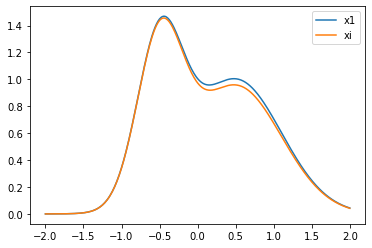

In [47]:
# Begin own work
X_size = np.shape(X)
rows = X_size[0]
cols = X_size[1]
# Part A
norm_frob = linalg.norm(X, ord='fro')
print("Part A: Frobenius norm of X = ", norm_frob)

#Part B
#print(X_size[0])
X_vec = X.reshape([1,(X_size[0]*X_size[1])])
norm_std = linalg.norm(X_vec)
print("Part B: Standard norm of vectorized X = ", norm_std)
print("\tNorms are equal: ", norm_frob == norm_std)

#Part C, D

Z = np.zeros_like(X)
norm_vecs = np.zeros(cols)
inner = np.zeros(cols, dtype=complex)

for i in range(cols):
  Z[:,i] = X[:,i]-X[:,0]
  norm_vecs[i] = linalg.norm(Z[:,i])
  inner[i] = np.inner(X[:,i], X[:,0])

norm_vecs_trim = np.delete(norm_vecs,0)
#print(norm_vecs_trim)
index = norm_vecs.argmin()+1
print("Part C: Column index which minimizes norm of difference with 0th: ", index)

inner_trim = np.delete(inner,0)
index_inner = inner_trim.argmax()+1
print("Part D: Column index which maximizes inner product with 0th: ", index_inner)
print("\tThis is different than the answer for C.")

plt.figure()
plt.plot(y,X[:,0], label="x1")
plt.plot(y,X[:,index_inner], label="xi")
plt.legend()
plt.show()